<a href="https://colab.research.google.com/github/SanjayMarreddi/The_Sparks_Foundation_ML_Internship/blob/master/TSF_ML_Internship_Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Abstract**

- This is done as a part of my Task 2 of  Machine Learning Internship, Graduate Rotational Internship Program (GRIP) at THE SPARKS FOUNDATION.


*Let us begin with Task named as '**To Explore the Unsupervised Machine Learning (Task#3)**'*


**Aim :**  
From the given ‘Iris’ dataset,
- Predict the optimum number of clusters. 
- Represent the clusters visually.

First Let us import the required Libraries

In [36]:
# Importing the libraries

# Numpy is for adding support for multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.
import numpy as np

# Matplotlib is a Plotting Library.
import matplotlib.pyplot as plt

# Pandas is for data manipulation and analysis.
import pandas as pd

# Scikit Learn  Library for helping various Machine Learning Algorithms.
from sklearn import datasets

# Importing the KMeans Clustering Class
from sklearn.cluster import KMeans

Now Let us load the required Dataset and Create the DataFrame

In [37]:
# Load the iris dataset
iris = datasets.load_iris()

# Creating a DataFrame
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)


### Simple Data Analysis

In [38]:
# See the first 5 rows
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [39]:
print("Number of Examples :" ,iris_df.shape[0])
print("Number of Features :" ,iris_df.shape[1])

Number of Examples : 150
Number of Features : 4


### Finding the optimum number of clusters for K Means Clustering

We are going to use 'The elbow method' for the purpose of opting the K 



In [40]:
# Creating an array of the Feature Values for all the Examples
X = iris_df.iloc[:, [0, 1, 2, 3]].values
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [41]:
# Finding the optimum number of clusters for k-means classification

# WCSS stands for Within Cluster Sum of Squares
wcss = []

# Iterating through Number of Clusters from 1-10
for i in range(1, 11):
    
    # Creating an Instance of KMeans Cluster by taking "i" number of clusters each time
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    
    # Fitting the Model onto Feature Set X
    kmeans.fit(X)

    # Now Appending the inertia value to list named "wcss"
    wcss.append(kmeans.inertia_)
    
# Let us print the List showing Inertia corresponding to various number of clusters.
wcss

[681.3706,
 152.34795176035792,
 78.85144142614601,
 57.25600931571815,
 46.44618205128205,
 39.03998724608725,
 34.299712121212124,
 30.014398496240602,
 28.036906353450473,
 26.53452922077922]

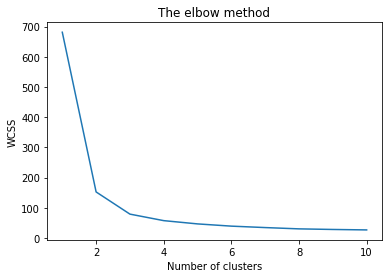

In [42]:
# Now, Plotting the results onto a line graph, allowing us to observe 'The elbow'

plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')

# Within cluster sum of squares
plt.ylabel('WCSS') 
plt.show()

- We can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. 

- This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

- From this we choose the number of clusters as **3**.


**Hence Optimal Number of Clusters is Predicted**

### Training the Classifier and making Prediction 

Now Let us Perform Final Clustering with Number of Clusters as **3**

In [48]:
# Applying kmeans to the dataset 
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)

# Now Predicting the Label of Each Cluster using our Trained Model
y_kmeans = kmeans.fit_predict(X)
y_kmeans


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

### Visualisation of the Clusters
Let us use Scatter Plots for this Purpose

 **1.** Let us use Last two Columns whose indices are (2,3) for Visualisation 

Points belonging to the Label 'Iris-setosa' while visualising Last two Columns


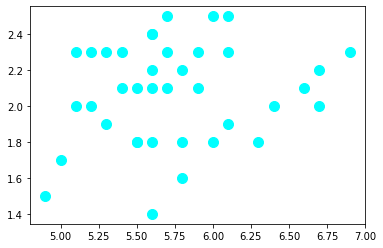

In [64]:
print("Points belonging to the Label 'Iris-setosa' while visualising Last two Columns")
plt.scatter(X[y_kmeans == 0, 2], X[y_kmeans == 0, 3], 
            s = 100, c = 'cyan', label = 'Iris-setosa')

Points belonging to the Label 'Iris-versicolour' while visualising Last two Columns 


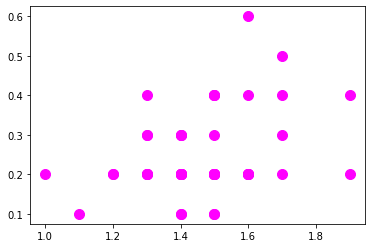

In [65]:
print("Points belonging to the Label 'Iris-versicolour' while visualising Last two Columns ")
plt.scatter(X[y_kmeans == 1, 2], X[y_kmeans == 1, 3], 
            s = 100, c = 'magenta', label = 'Iris-versicolour')


Points belonging to the Label 'Iris-virginica' 


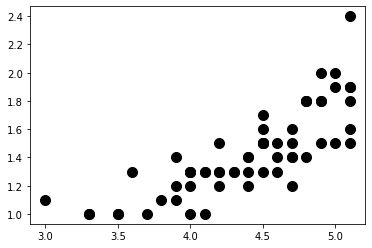

In [67]:
print("Points belonging to the Label 'Iris-virginica' while visualising Last two Columns")
plt.scatter(X[y_kmeans == 2, 2], X[y_kmeans == 2, 3],
            s = 100, c = 'black', label = 'Iris-virginica')


### Showing all the Cluster Groups at a time along with the Cluster Centroids when "last two columns" are used


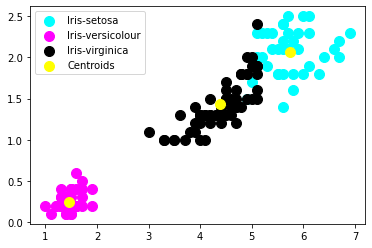

In [71]:
plt.scatter(X[y_kmeans == 0, 2], X[y_kmeans == 0, 3], 
            s = 100, c = 'cyan', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 2], X[y_kmeans == 1, 3], 
            s = 100, c = 'magenta', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 2], X[y_kmeans == 2, 3],
            s = 100, c = 'black', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:,3], 
            s = 100, c = 'yellow', label = 'Centroids')
plt.legend()

 **2.** Now, Let us use First and Last Columns whose indices are (0,3) for Visualisation 

Points belonging to the Label 'Iris-setosa' while visualising First and Last Columns


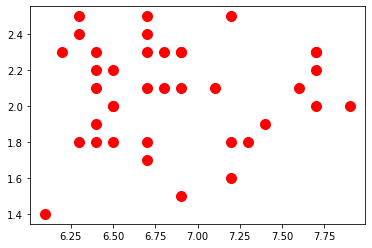

In [73]:
print("Points belonging to the Label 'Iris-setosa' while visualising First and Last Columns")
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 3], 
            s = 100, c = 'red', label = 'Iris-setosa')


Points belonging to the Label 'Iris-versicolour' while visualising First and Last Columns


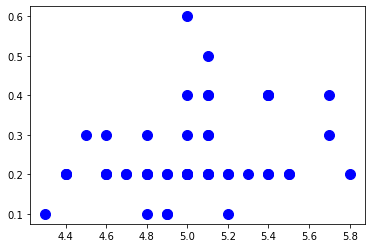

In [74]:
print("Points belonging to the Label 'Iris-versicolour' while visualising First and Last Columns")
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 3], 
            s = 100, c = 'blue', label = 'Iris-versicolour')

Points belonging to the Label 'Iris-virginica' while visualising First and Last Columns


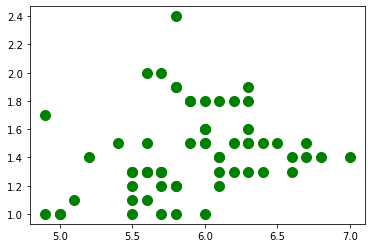

In [75]:
print("Points belonging to the Label 'Iris-virginica' while visualising First and Last Columns")
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 3],
            s = 100, c = 'green', label = 'Iris-virginica')


### Showing all the Cluster Groups at a time along with the Cluster Centroids when "First and Last Columns" are used


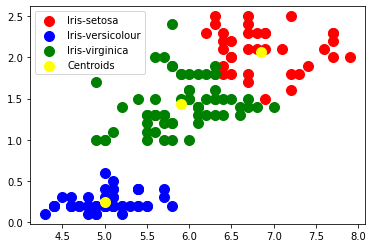

In [76]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 3], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 3], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 3],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,3], 
            s = 100, c = 'yellow', label = 'Centroids')
plt.legend()

**Hence Visual Representation of Clusters is also done !**